In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
# Veriyi yükleyin
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('creditcard.csv')

df.head()


Saving creditcard.csv to creditcard (1).csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Veri şekli: (284807, 31)
Eksik veri sayısı:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


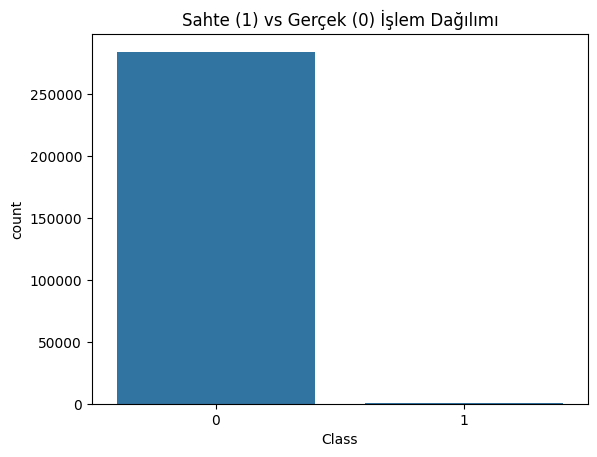

In [4]:
print("Veri şekli:", df.shape)

print("Eksik veri sayısı:\n", df.isnull().sum())

# Hedef değişkenin (Class) dağılımı
print(df['Class'].value_counts())

# Dağılımı görselleştirmesi
sns.countplot(x='Class', data=df)
plt.title('Sahte (1) vs Gerçek (0) İşlem Dağılımı')
plt.show()


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

# Eğitim ve test veri seti ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE uygulayarak sahte işlemleri artır
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("SMOTE sonrası sınıf dağılımı:\n", pd.Series(y_res).value_counts())


SMOTE sonrası sınıf dağılımı:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.92      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.78      0.58        98

    accuracy                           1.00     56962
   macro avg       0.73      0.89      0.79     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
nb = GaussianNB()
nb.fit(X_res, y_res)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.70      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.85      0.62     56962
weighted avg       1.00      0.99      0.99     56962



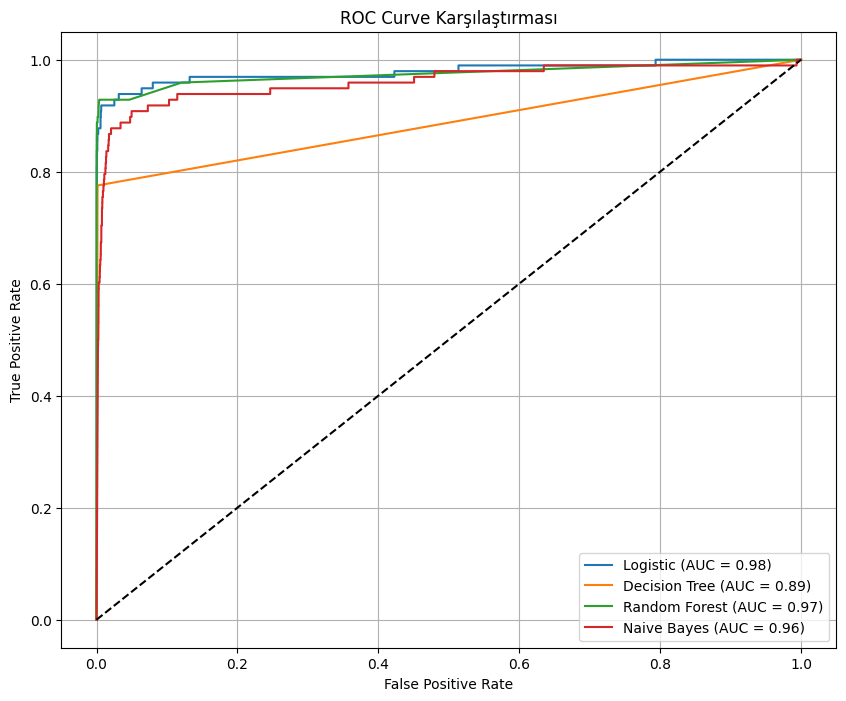

In [ ]:
models = {
    "Logistic": (lr, y_pred_lr),
    "Decision Tree": (dt, y_pred_dt),
    "Random Forest": (rf, y_pred_rf),
    "Naive Bayes": (nb, y_pred_nb),
}

plt.figure(figsize=(10, 8))
for name, (model, pred) in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Karşılaştırması')
plt.legend()
plt.grid()
plt.show()


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



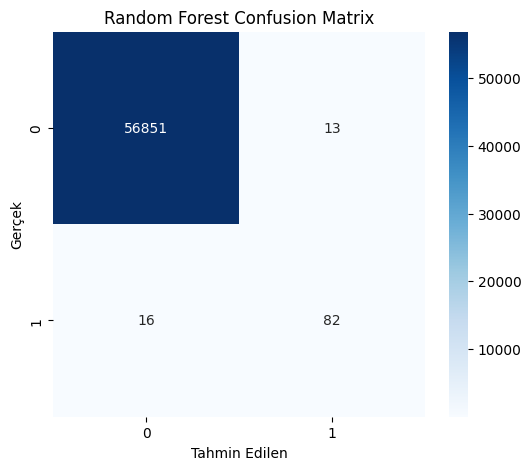

In [ ]:
# Model eğitimi ve tahmin
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

# Sınıflandırma raporu
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred_rf)

# Görselleştirme
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Random Forest Confusion Matrix')
plt.show()
